In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform
import os
import open3d as o3d
import torch
import h5py
from io import StringIO

In [3]:
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484734/1494103/rotation_000.tif'))

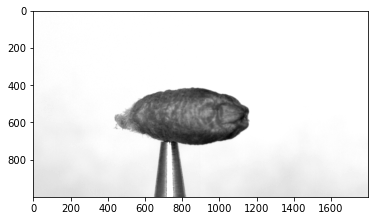

In [4]:
plt.imshow(img, cmap='gray')

In [17]:
y_n = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [18]:
bX = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter = ',')

In [19]:
y_n2 = y_n[:500,:]

In [20]:
y_n2.shape

(500, 441)

In [21]:
dirs = bX[:2,:]

In [22]:
dirs.shape

(2, 500)

In [23]:
dirs = dirs.transpose()

In [5]:
import h5py

In [6]:
mainpath = 'C:/cherepashkin1/phenoseed_csv/'
F_Nw = np.array(h5py.File(os.path.join(
    mainpath, '598csv9_F_N.h5').replace('\\', '/'),
        'r').get('dataset'))

In [7]:
F_Nw.shape

(5270, 441)

In [8]:
with open(os.path.join(mainpath,'598csv9_F_N_file_names.txt'),'r') as f:
    F_N_names = f.readlines()
F_N_names = [c.replace('\n','') for c in F_N_names]

In [9]:
[i for i, s in enumerate(F_N_names) if '1484734_1494103' in s][0]

2049

In [10]:
1484734/1494103

0.993729347976679

In [11]:
F_N = F_Nw[2049,:]

In [12]:
cbs = 1

In [24]:
iscuda = False
y_n2 = torch.unsqueeze(torch.Tensor(y_n2), axis=0)
dirs = torch.unsqueeze(torch.Tensor(dirs), axis=0)
F_N = torch.unsqueeze(torch.Tensor(F_N), axis =0)
print(F_N.shape)


torch.Size([1, 441])


In [26]:
def f2p(y_n, f_n, dirs, nsp, vox2mm):
    p = torch.zeros(\
        y_n.shape[0],3,nsp)
    p = p.cuda() if iscuda else p
    for i in range(y_n.shape[0]):
        print(y_n[i].shape,f_n[i].shape )
        far = torch.matmul(y_n[i], f_n[i])
        p[i,0,:]=far*torch.cos(dirs[i,:,0])*\
            torch.sin(dirs[i,:,1])
        p[i,1,:]=far*torch.sin(dirs[i,:,0])*\
            torch.sin(dirs[i,:,1])
        p[i,2,:]=far*torch.cos(dirs[i,:,1])
    p *= vox2mm
    return p

In [28]:
nsp = 500

In [29]:
p = f2p(y_n2, F_N, dirs, nsp, 0.05)

torch.Size([500, 441]) torch.Size([441])


In [30]:
p.shape

torch.Size([1, 3, 500])

In [31]:
p1 = torch.squeeze(p)

In [32]:
p1.shape

torch.Size([3, 500])

In [33]:
p1 = p1.numpy()

In [34]:
p1.shape

(3, 500)

In [ ]:
ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
if p1 is not None:
    ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.view_init(elev=el, azim=az)
ax_lim = 120*vox2mm
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)

In [ ]:
dirs = torch.transpose(dirs, 1, 2)

In [ ]:
dirs.shape

In [ ]:
import torch

In [ ]:
y_n = torch.Tensor(y_n)

In [ ]:
nsp = 500
y_n2_one = torch.unsqueeze(y_n[:nsp,:], axis=0)
# y_n2_one = torch.Tensor(y_n2_one).cuda() if iscuda else\
#     torch.Tensor(y_n2_one)
# dirs = torch.Tensor(dirs).cuda() if iscuda else torch.Tensor(dirs)
y_n2 = y_n2_one.repeat(3*2, 1, 1)

In [ ]:
y_n2.shape

In [ ]:
y_n.shape

In [ ]:
y_n2[:3].shape

In [ ]:
y_n2.shape

In [ ]:
pcd = p1

pcd0 shape =  (500, 4)


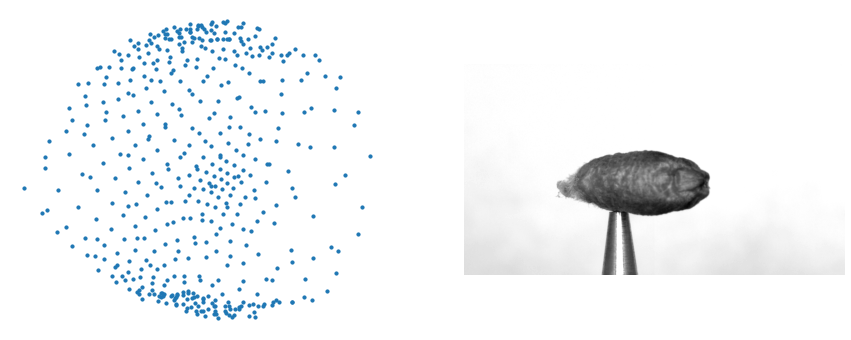

In [100]:
p1.shape

(3, 500)

In [36]:
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p1.transpose())
o3d.visualization.draw_geometries([pcd3])

In [40]:
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p2)
o3d.visualization.draw_geometries([pcd3])

In [101]:
print(prmat00

array([[ 7.4039063e+02,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  7.4039063e+02,  0.0000000e+00,  0.0000000e+00],
       [-4.5703125e+01, -2.7218750e+01, -5.0781250e-02, -5.0781250e-02],
       [-1.8280709e+05, -9.9071000e+04, -1.2100000e+02, -1.2100000e+02]])

In [105]:
prmat00 = prmat[:4,:]

In [41]:
def prmatread(path):
    with open(path, 'r') as f:
        prmatext = f.readlines()
    pr2 = [prmatext[i].replace('[','').replace(']','').replace(';','') for i in range(len(prmatext))]
    pr3 = ''
    for i in pr2:
        pr3+=i
    pr4 = np.genfromtxt(StringIO(pr3), delimiter=',')
    return pr4

[[ 7.4039063e+02  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  7.4039063e+02  0.0000000e+00  0.0000000e+00]
 [-4.5703125e+01 -2.7218750e+01 -5.0781250e-02 -5.0781250e-02]
 [-1.8250942e+05 -9.8688500e+04 -1.2100000e+02 -1.2100000e+02]]
pcd0 shape =  (31906, 4)


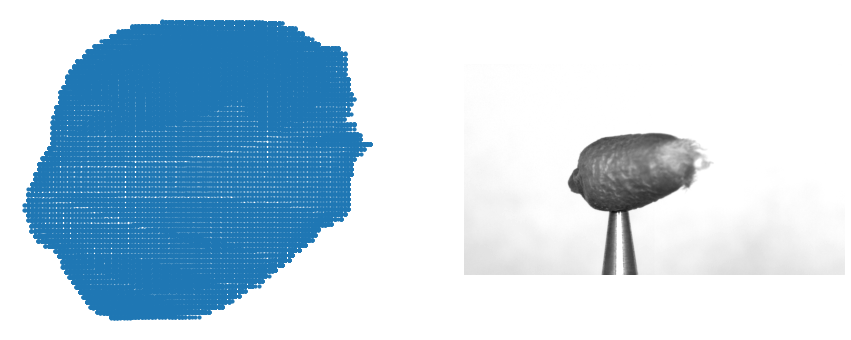

In [66]:
idx = '110'
pr = prmatread('C:/cherepashkin1/phenoseed/598/1484734/1494'+idx+'_ProjectionMatrices.txt')
prmat00 = pr[:4,:].transpose()

# prmat00[:,3] = [0,0,0,0]
print(prmat00)
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484734/1494'+idx+'/rotation_000.tif'))
p2 = np.asarray(o3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484734/1494'+idx+'_Surface.ply').points)
# print(prmat00)
# prmat00 = prmat0
# prmat00 = prmat00.transpose()
# pcd = pcd.transpose()
# pcd = p1.transpose()
# p1 = 
pcd = p2
pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
print('pcd0 shape = ', pcd0.shape)
pcd1 = np.matmul(pcd0,prmat00)
pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# vox2mm = 1
pcd3 = pcd2 - np.mean(pcd2,axis=0)
pcd3 = pcd3.transpose()
# print(pcd3.shape)
# pcd3 = pcd3[:,::4]
# print(pcd3[:2,:].shape)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(pcd3[0,:],-pcd3[1,:], s=10)
_ = ax.axis('off')
ax = fig.add_subplot(1, 2, 2)
# print('shape img = ', img.shape)
# print('img stat=', getstat(img))
ax.imshow(img, cmap='gray')
# ax.imshow(np.max(img)-img, cmap='Greys')
_ = ax.axis('off')

In [148]:
pr.shape

(144, 4)

In [138]:
pr2 = np.genfromtxt('prmat.txt',delimiter=',')

In [139]:
pr2.shape

(144, 4)

In [140]:
pr2[:4,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8251056e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [ ]:
with open('example.txt','r') as f:
    text = f.readlines()

In [77]:
ex = np.genfromtxt('example.txt',delimiter=',')

In [78]:
ex

array([[ 3.53553e+02,  3.39645e+02,  2.77744e+02, -1.44946e+06],
       [-1.03528e+02,  2.33212e+01,  4.59607e+02, -6.32525e+05],
       [ 7.07107e-01, -3.53553e-01,  6.12372e-01, -9.18559e+02]])

In [79]:
ex1 = np.zeros([4,4])

In [80]:
ex1[:3,:] = ex

In [98]:
ex1[3,:] = [0,0,0,1]

In [99]:
ex1

array([[ 3.53553e+02,  3.39645e+02,  2.77744e+02, -1.44946e+06],
       [-1.03528e+02,  2.33212e+01,  4.59607e+02, -6.32525e+05],
       [ 7.07107e-01, -3.53553e-01,  6.12372e-01, -9.18559e+02],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00]])

In [85]:
from numpy import linalg

In [94]:
ex1[1:,:3].shape

(3, 3)

In [100]:
linalg.det(ex1[1:,:3])

0.0